In [ ]:
#Проект по предсказанию уровня ожирения человека на основе данных о питании, физической активности и образе жизни.

In [16]:
from google.colab import files
uploaded = files.upload()

In [17]:
!pip install --quiet gdown

#Файл с Google Drive
!gdown --id 1WgnQhugSuEnbTbNNtBBLjCHwyckZxWli --output obesity.csv

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WgnQhugSuEnbTbNNtBBLjCHwyckZxWli
To: /content/obesity.csv
100% 275k/275k [00:00<00:00, 107MB/s]


In [18]:
import pandas as pd

df = pd.read_csv("obesity.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#Целевая переменная
y = df["NObeyesdad"]
X = df.drop("NObeyesdad", axis=1)

#Категориальные переменные
X = pd.get_dummies(X)

#Классы
le = LabelEncoder()
y = le.fit_transform(y)

#Числовые признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Делим на train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2690 - loss: 1.8969 - val_accuracy: 0.5030 - val_loss: 1.4364
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5053 - loss: 1.4119 - val_accuracy: 0.6243 - val_loss: 1.1523
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6025 - loss: 1.1393 - val_accuracy: 0.6834 - val_loss: 0.9891
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6838 - loss: 0.9640 - val_accuracy: 0.7012 - val_loss: 0.8717
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7122 - loss: 0.8219 - val_accuracy: 0.7367 - val_loss: 0.7822
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7491 - loss: 0.7344 - val_accuracy: 0.7722 - val_loss: 0.7061
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7805 - loss: 0.6730 - val_accuracy: 0.7692 - val_loss: 0.6635
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8025 - loss: 0.5822 - val_accuracy: 0.7811 - val_loss: 0.6040


In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2%}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9141 - loss: 0.3046 
Test Accuracy: 91.96%


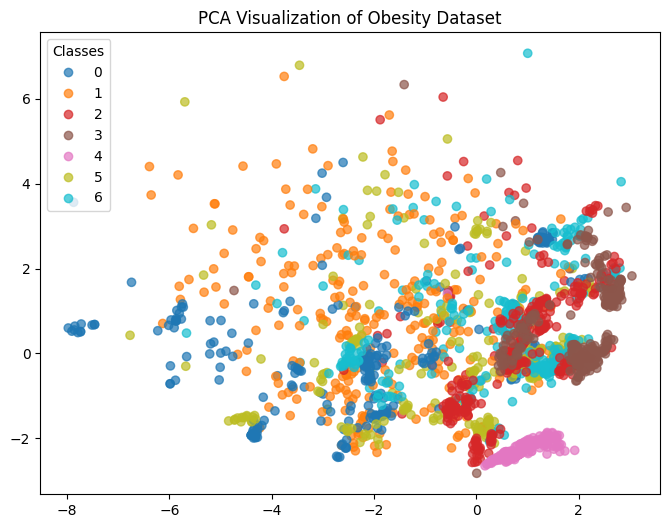

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("PCA Visualization of Obesity Dataset")
plt.show()

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

model1 = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(7, activation='softmax')
])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

loss1, acc1 = model1.evaluate(X_test, y_test)
print(f"🔹 Model 1 Accuracy: {acc1:.2%}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8950 - loss: 0.2841 
🔹 Model 1 Accuracy: 90.78%


In [24]:
from tensorflow.keras import models, layers

#Глубокая модель
model2 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(7, activation='softmax')
])

#Компилируем
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Обучаем
history2 = model2.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

#Оцениваем
loss2, acc2 = model2.evaluate(X_test, y_test, verbose=0)
print(f"🔸 Model 2 Accuracy on test set: {acc2:.2%}")

Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3196 - loss: 1.8614 - val_accuracy: 0.5621 - val_loss: 1.3958
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5462 - loss: 1.3567 - val_accuracy: 0.6272 - val_loss: 1.0009
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6085 - loss: 1.0409 - val_accuracy: 0.6893 - val_loss: 0.8413
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6870 - loss: 0.8809 - val_accuracy: 0.7278 - val_loss: 0.7145
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7187 - loss: 0.7313 - val_accuracy: 0.7722 - val_loss: 0.6144
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7724 - loss: 0.6362 - val_accuracy: 0.7929 - val_loss: 0.5405
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8078 - loss: 0.5497 - val_accuracy: 0.8195 - val_loss: 0.4660
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8141 - loss: 0.5080 - val_accuracy: 0.8491 - val_loss:

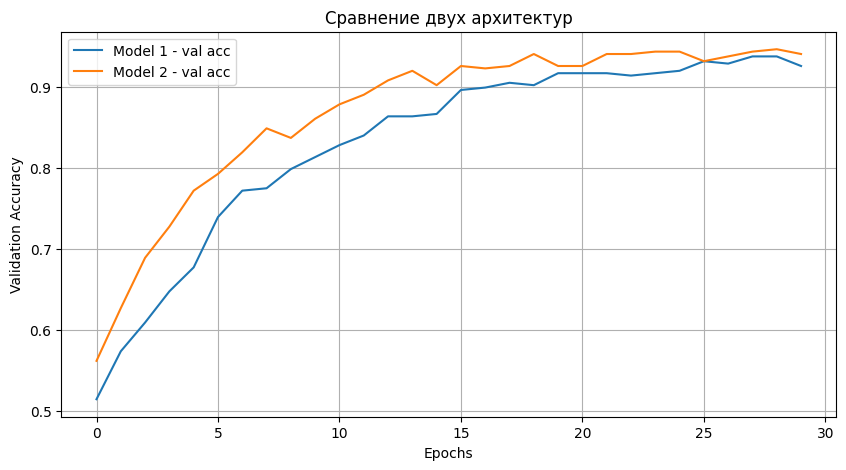

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history1.history['val_accuracy'], label='Model 1 - val acc')
plt.plot(history2.history['val_accuracy'], label='Model 2 - val acc')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Сравнение двух архитектур")
plt.grid()
plt.show()

In [26]:
#Данные для Conv1D
#32 признака
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1)

model_cnn = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=30, batch_size=32, validation_split=0.2)
loss_cnn, acc_cnn = model_cnn.evaluate(X_test_cnn, y_test)
print(f"CNN Test Accuracy: {acc_cnn:.2%}")

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3949 - loss: 1.7300 - val_accuracy: 0.5651 - val_loss: 1.1883
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6004 - loss: 1.0839 - val_accuracy: 0.6302 - val_loss: 0.9648
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6907 - loss: 0.8791 - val_accuracy: 0.6746 - val_loss: 0.8910
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7066 - loss: 0.7874 - val_accuracy: 0.7160 - val_loss: 0.8061
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7583 - loss: 0.6775 - val_accuracy: 0.7426 - val_loss: 0.7080
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7798 - loss: 0.6130 - val_accuracy: 0.7722 - val_loss: 0.6559
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8067 - loss: 0.5391 - val_accuracy: 0.7811 - val_loss: 0.6093
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8266 - loss: 0.4704 - val_accuracy: 0.7574 - val_loss: 0.6064
Ep

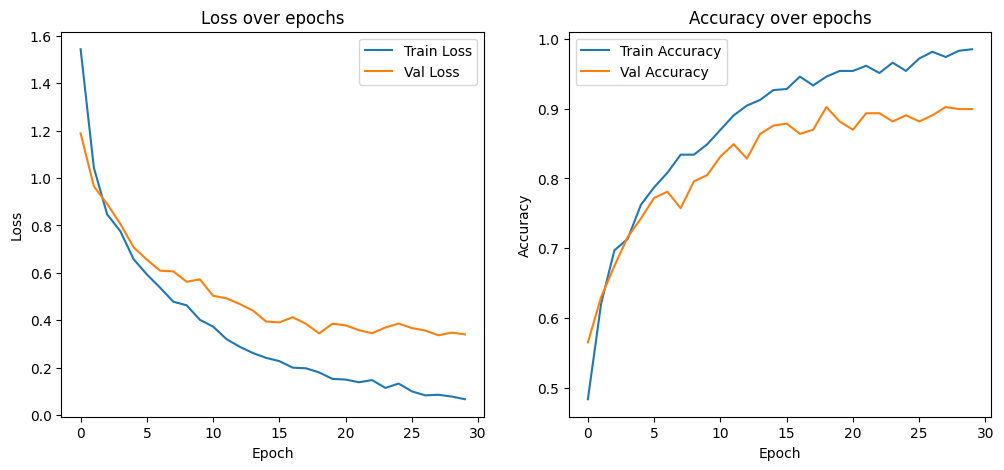

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


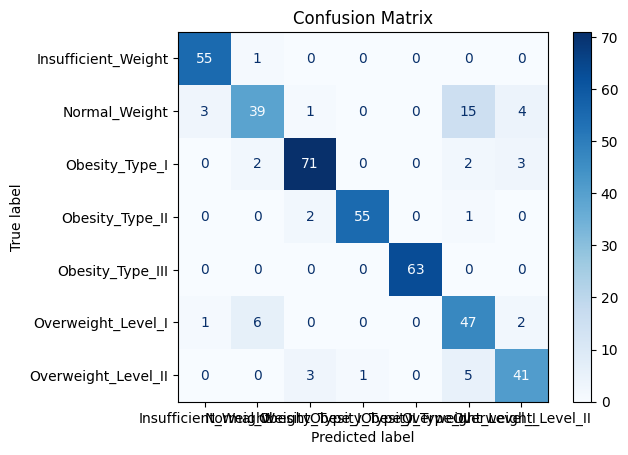

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model_cnn.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

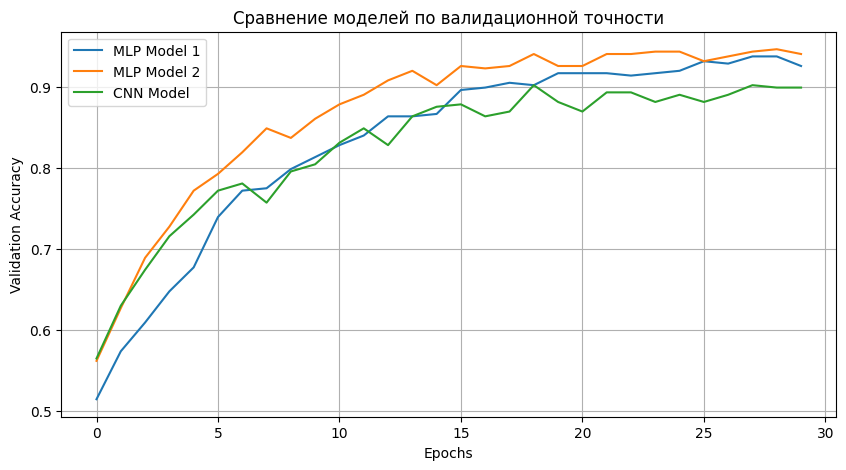

Точность MLP Model 1 на тесте: 90.78%
Точность MLP Model 2 на тесте: 91.25%
Точность CNN Model на тесте: 87.71%


In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

#Валидационная точность для 3 моделей
plt.figure(figsize=(10,5))
plt.plot(history1.history['val_accuracy'], label='MLP Model 1')
plt.plot(history2.history['val_accuracy'], label='MLP Model 2')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Model')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Сравнение моделей по валидационной точности")
plt.legend()
plt.grid()
plt.show()

#Точность на тесте
_, acc1 = model1.evaluate(X_test, y_test, verbose=0)
_, acc2 = model2.evaluate(X_test, y_test, verbose=0)
_, acc_cnn = model_cnn.evaluate(X_test_cnn, y_test, verbose=0)

print(f"Точность MLP Model 1 на тесте: {acc1:.2%}")
print(f"Точность MLP Model 2 на тесте: {acc2:.2%}")
print(f"Точность CNN Model на тесте: {acc_cnn:.2%}")